# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [9]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

pass_df = df_titanic[df_titanic["type"] == "passenger"]
joint_distribution = pd.crosstab(pass_df["class"], pass_df["embarked"])
print(joint_distribution)

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494
embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [15]:
classcon = pd.crosstab(pass_df["class"], pass_df["embarked"], normalize='columns')
embarkedcon= pd.crosstab(pass_df["embarked"], pass_df["class"], normalize='columns')
print(classcon)
print(embarkedcon)
print("Approximatly 70% of 3rd class passengers embarked at Southhampton")
print("Approximatly 54% of Southhampton passengers were in 3rd class")

embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
class          1st       2nd       3rd
embarked                              
B         0.009259  0.021127  0.000000
C         0.441358  0.091549  0.143865
Q         0.009259  0.024648  0.159379
S         0.540123  0.862676  0.696756
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
class          1st       2nd       3rd
embarked                              
B         0.009259  0.021127  0.000000
C         0.441358  0.091549  0.143865
Q         0.009259  0.024648  0.159379
S         0.540123  0.862676  0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='embarked'>

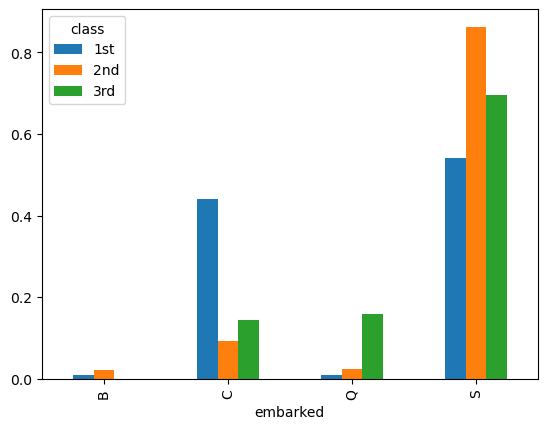

In [20]:
embarkedcon.plot(kind='bar')